# Algorithmic Trading: An overview

Algorithmic trading involves using computer algorithms to execute trades based on predefined criteria.

The following code gives a basic algorithmic trading strategy using the Moving Average Crossover method on S&P 500 index data.

Moving Average Crossover
- MAC is based on the idea that the crossover of moving averages can signal changes in the market trend.
- When the short-term moving average crosses above the long-term moving average, it's considered a positive signal, suggesting that it might be a good time to buy or enter the market. (Suggests prices are gaining upward momentum.)
 - Conversely, when the short-term moving average crosses below the long-term moving average, it might be a signal to sell or exit the market. (Implies downward momentum and potential trend reversal to the downside.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
# Download S&P 500 data
data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Calculate short-term and long-term moving averages
short_window = 40
long_window = 100

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()


In [9]:
# Generate signals
data['Signal'] = 0
data.loc[data.index[short_window:], 'Signal'] = np.where(
    data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1
)


In [10]:
data

Price,Close,High,Low,Open,Volume,Short_MA,Long_MA,Signal
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,
Date,,,,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000,3257.850098,3257.850098,0
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000,3246.350098,3246.350098,0
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000,3246.326742,3246.326742,0
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000,3244.040039,3244.040039,0
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000,3245.842041,3245.842041,0
...,...,...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,5959.560999,5764.064390,1
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,5964.677747,5772.576987,1


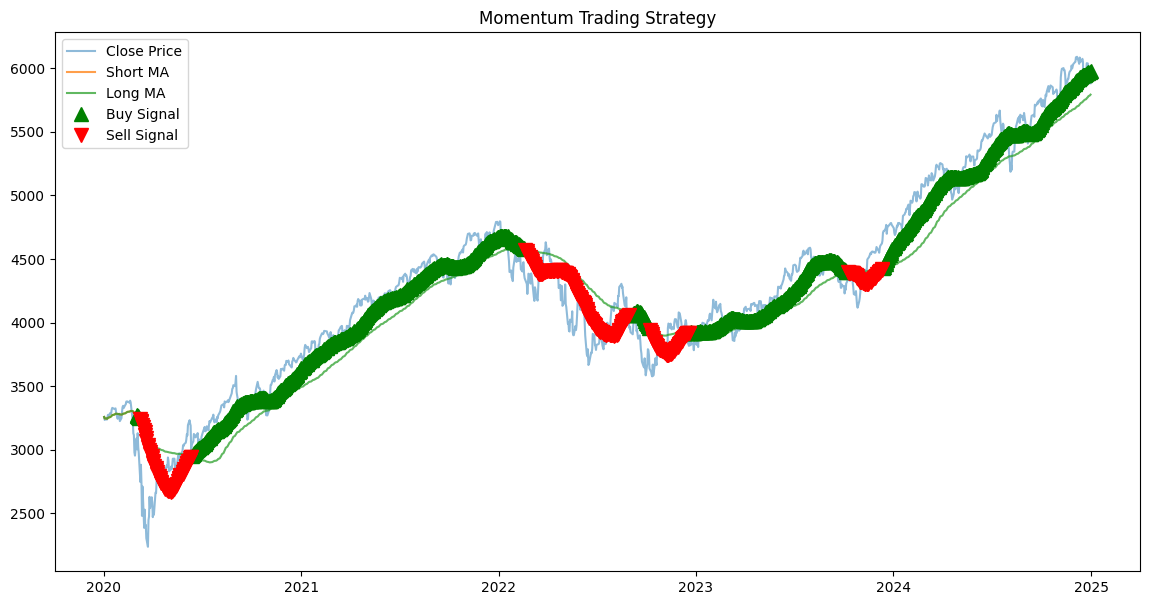

In [11]:
# Plot the closing price, the short-term and long-term moving averages and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label='Short MA', alpha=0.75)
plt.plot(data['Long_MA'], label='Long MA', alpha=0.75)

# Highlight buy signals
plt.plot(data[data['Signal'] == 1].index,
         data['Short_MA'][data['Signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Highlight sell signals
plt.plot(data[data['Signal'] == -1].index,
         data['Short_MA'][data['Signal'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Momentum Trading Strategy')
plt.legend(loc='best')
plt.show()

Composer (https://www.composer.trade) and similar platforms typically provide the option to execute trades automatically based on the defined strategy rules, allowing the strategy to run in real-time with minimal manual intervention.

For example:

    if 'Signal' == 1:

        api.submit_order(symbol=stock,
                        qty=1,
                        side='buy',
                        type='market',
                        time_in_force='gtc'
                        )

## Backtesting

Let's have a look at more detailed trading strategies, and the backtesting of these strategies.

In [12]:
!pip install backtrader

  Obtaining dependency information for backtrader from https://files.pythonhosted.org/packages/f3/ef/328c6ec332435f63b3e18febd263686b8ba07e990676a862cc8522ba38f5/backtrader-1.9.78.123-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 975.1 kB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
!pip install quantstats

  Obtaining dependency information for quantstats from https://files.pythonhosted.org/packages/cc/74/b9cf9a2cf911d48c120635b71281a3a28323e97813e7a4d459b6acfd6447/QuantStats-0.0.64-py2.py3-none-any.whl.metadata
  Obtaining dependency information for seaborn>=0.9.0 from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for tabulate>=0.8.0 from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.4 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [14]:
import backtrader as bt
import yfinance as yf

import quantstats as qs

#### Momentum Strategy

The following strategy attempts to capitalize on momentum by entering positions when the short-term trend is upward (supported by increased volume) and exiting when the trend appears to reverse, using volume as a confirmation signal to increase the likelihood of trading on significant movements.

In [19]:
# Define the trading strategy class that inherits from backtrader.Strategy
class MomentumStrategy(bt.Strategy):
    # Define strategy parameters: short and long moving average windows, and volume moving average window
    params = (
        ('short_window', 40),     # Period for the short-term simple moving average (SMA)
        ('long_window', 100),     # Period for the long-term simple moving average (SMA)
        ('volume_window', 40),    # Period for the simple moving average of volume
    )

    def __init__(self):
        # Initialize the short-term SMA of the closing prices, using the period specified by short_window
        self.short_ma = bt.indicators.SMA(self.data.close, period=self.params.short_window)
        # Initialize the long-term SMA of the closing prices, using the period specified by long_window
        self.long_ma = bt.indicators.SMA(self.data.close, period=self.params.long_window)
        # Initialize the SMA of the volume, using the period specified by volume_window
        self.volume_sma = bt.indicators.SMA(self.data.volume, period=self.params.volume_window)

    def next(self):
        # Logic to execute on each tick of data (each bar/candle)

        if not self.position:  # Check if currently not holding a position
            # Buy condition: short-term SMA is above long-term SMA and current volume is above its SMA
            if self.short_ma[0] > self.long_ma[0] and self.data.volume[0] > self.volume_sma[0]:
                self.buy()  # Execute a buy order to enter the market
        else:  # Else, if currently holding a position
            # Sell condition: short-term SMA is below long-term SMA and current volume is below its SMA
            if self.short_ma[0] < self.long_ma[0] and self.data.volume[0] < self.volume_sma[0]:
                self.close()  # Execute a sell order to close the position

#### Hybrid Strategy

The following strategy uses both momentum and mean reversion indicators to make buy and sell decisions:

*   **Momentum Trading**: It uses the Moving Average Convergence Divergence (MACD) indicator to identify the momentum. A buy signal is generated when the MACD line crosses above the signal line, suggesting an upward momentum. Conversely, a sell signal is generated when the MACD line crosses below the signal line, indicating a loss of momentum or downward movement.

*   **Mean Reversion Trading**: This part of the strategy involves the Bollinger Bands and the RSI indicator. The buy condition is triggered when the stock price is below the lower Bollinger Band and the RSI is below the oversold threshold, indicating the stock might be undervalued and due for a price correction upwards. The sell condition is the opposite, where the stock price is above the upper Bollinger Band and the RSI is above the overbought threshold, indicating the stock might be overvalued and due for a price correction downwards.

In [31]:
# Define the trading strategy class, inheriting from backtrader.Strategy
class HybridStrategy(bt.Strategy):
    # Strategy parameters including periods for momentum, mean reversion, and conditions for RSI
    params = (
        ('momentum_period', 12),    # Period for the moving average convergence divergence (MACD) indicator
        ('reversion_period', 20),   # Period for the Bollinger Bands
        ('stddev_factor', 2),       # Standard deviation factor for the width of Bollinger Bands
        ('rsi_period', 14),         # Period for the Relative Strength Index (RSI)
        ('rsi_overbought', 70),     # RSI level considered overbought
        ('rsi_oversold', 30),       # RSI level considered oversold
    )

    def __init__(self):
        # Initialize the MACD indicator for momentum analysis
        self.macd = bt.indicators.MACD(self.data.close, period_me1=self.params.momentum_period)
        # Initialize the Bollinger Bands indicator for mean reversion analysis
        self.bollinger = bt.indicators.BollingerBands(self.data.close, period=self.params.reversion_period,
                                                      devfactor=self.params.stddev_factor)
        # Initialize the RSI indicator for mean reversion analysis
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)

    def next(self):
        # Logic executed for each new data point

        if not self.position:  # Check if not currently in the market
            # Momentum buy condition: MACD line crosses above its signal line
            if self.macd.lines.macd[0] > self.macd.lines.signal[0]:
                self.buy()  # Execute a buy order
            # Mean reversion buy condition: Close price below the lower Bollinger Band and RSI indicates oversold
            elif self.data.close[0] < self.bollinger.lines.bot[0] and self.rsi[0] < self.params.rsi_oversold:
                self.buy()  # Execute a buy order

        else:  # If currently in the market
            # Momentum sell condition: MACD line crosses below its signal line
            if self.macd.lines.macd[0] < self.macd.lines.signal[0]:
                self.close()  # Execute a sell order to close the position
            # Mean reversion sell condition: Close price above the upper Bollinger Band and RSI indicates overbought
            elif self.data.close[0] > self.bollinger.lines.top[0] and self.rsi[0] > self.params.rsi_overbought:
                self.close()  # Execute a sell order to close the position


**Backtesting**

Now, the trading strategy can be backtested -- a method used in trading and finance to assess the viability of a trading strategy or model by simulating its performance using historical data.


*   It's important to remember that past performance is not necessarily indicative of future results.

In [42]:
# Download historical data
data = yf.download('SPY', start='2013-01-01', end='2023-01-01',multi_level_index=False)
data = bt.feeds.PandasData(dataname=data)


[*********************100%***********************]  1 of 1 completed


In [43]:
# Create a backtest environment and add the strategy
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)
cerebro.adddata(data)                               # This provides OHLCV data to your strategy

In [44]:
# Set initial investment and add a sizer
cerebro.broker.set_cash(10000)                      # Set initial investment
cerebro.addsizer(bt.sizers.FixedSize, stake=10)     # every order will trade a fixed quantity of 10 units.
                                                    # This is passed to the strategy for each buy() or sell() execution.

In [45]:
# Add analyzers
# the PyFolio analyzer to collect strategy performance metrics in a format compatible with the PyFolio library (e.g., returns, positions, transactions).
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [46]:
# Run the backtest
results = cerebro.run()
portfolio_stats = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()

In [47]:
# Print final portfolio value
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Final Portfolio Value: 11562.86


In [56]:
# Performance Summary metrics
performance_summary = {
    "Metric": [
        "Cumulative Return",
        "Annual Return",
        "Volatility",
        "Sharpe Ratio",
        "Sortino Ratio",
        "Calmar Ratio",
        "Max Drawdown",
        "Longest Drawdown Duration",
        "Daily Win %",
        "Best Day / Worst Day"
    ],
    "Description": [
        "Total return over the entire backtest period, showing the growth of $1 invested.",
        "Annualized average return, adjusted for the number of trading days.",
        "Annualized standard deviation of returns — a measure of risk.",
        "Risk-adjusted return: how much excess return per unit of volatility. Typically, higher is better.",
        "Like Sharpe, but penalizes only downside volatility — more sensitive to negative returns.",
        "Annual return divided by the maximum drawdown — shows return relative to worst-case loss.",
        "Largest observed peak-to-trough loss during the backtest. Indicates potential capital loss.",
        "Time it took to recover from the worst drawdown. A proxy for investor patience required.",
        "Proportion of days with positive returns.",
        "The largest daily gain/loss. Useful for understanding tail risk."
    ]
}

# Risk Metrics
risk_metrics = {
    "Metric": [
        "Value at Risk (VaR)",
        "Conditional VaR (CVaR)",
        "Skew / Kurtosis",
        "Stability of Returns"
    ],
    "Description": [
        "95% or 99% downside risk estimate — expected worst loss on a bad day.",
        "Expected loss beyond the VaR threshold — a more robust measure of tail risk.",
        "Shape characteristics of the return distribution (e.g., fat tails, asymmetry).",
        "R² from regression of cumulative returns — higher means more consistent performance."
    ]
}




In [57]:
# Create DataFrames
df_performance_summary = pd.DataFrame(performance_summary)
df_performance_summary

,Metric,Description
0,Cumulative Return,"Total return over the entire backtest period, ..."
1,Annual Return,"Annualized average return, adjusted for the nu..."
2,Volatility,Annualized standard deviation of returns — a m...
3,Sharpe Ratio,Risk-adjusted return: how much excess return p...
4,Sortino Ratio,"Like Sharpe, but penalizes only downside volat..."
5,Calmar Ratio,Annual return divided by the maximum drawdown ...
6,Max Drawdown,Largest observed peak-to-trough loss during th...
7,Longest Drawdown Duration,Time it took to recover from the worst drawdow...
8,Daily Win %,Proportion of days with positive returns.
9,Best Day / Worst Day,The largest daily gain/loss. Useful for unders...


In [58]:
df_risk_metrics = pd.DataFrame(risk_metrics)
df_risk_metrics

,Metric,Description
0,Value at Risk (VaR),95% or 99% downside risk estimate — expected w...
1,Conditional VaR (CVaR),Expected loss beyond the VaR threshold — a mor...
2,Skew / Kurtosis,Shape characteristics of the return distributi...
3,Stability of Returns,R² from regression of cumulative returns — hig...


                           Strategy
-------------------------  ----------
Start Period               2013-01-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             78.0%

Cumulative Return          15.63%
CAGR﹪                     1.01%

Sharpe                     0.43
Prob. Sharpe Ratio         91.03%
Smart Sharpe               0.38
Sortino                    0.58
Smart Sortino              0.5
Sortino/√2                 0.41
Smart Sortino/√2           0.36
Omega                      1.11

Max Drawdown               -9.34%
Longest DD Days            654
Volatility (ann.)          3.5%
Calmar                     0.11
Skew                       -1.28
Kurtosis                   22.93

Expected Daily %           0.01%
Expected Monthly %         0.12%
Expected Yearly %          1.46%
Kelly Criterion            5.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.36%
Expected Shortfall (cVaR)  -0.36%

Max Consecutive Wins       11


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2021-01-07,323,-9.339569,-8.051027
2,2022-01-04,2022-12-28,2022-12-30,361,-6.278972,-5.904633
3,2015-07-21,2016-06-27,2017-05-04,654,-2.995810,-2.732433
4,2018-01-29,2018-10-29,2019-06-19,507,-2.568623,-2.302287
5,2021-09-03,2021-10-04,2021-10-19,47,-1.828254,-1.788689


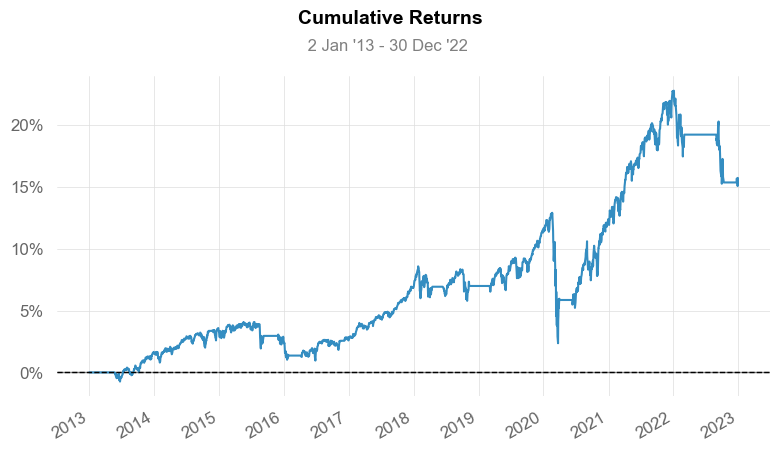

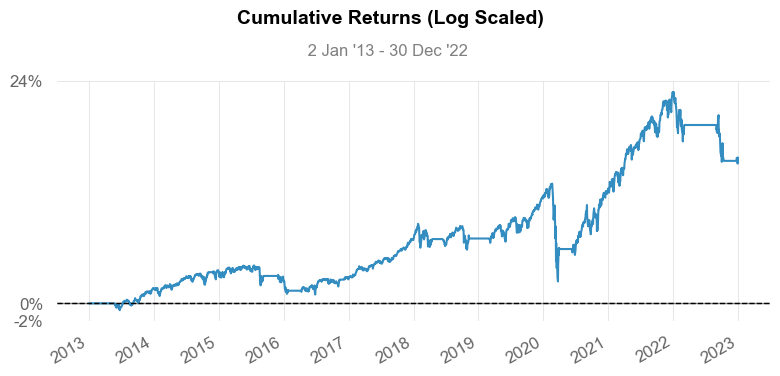

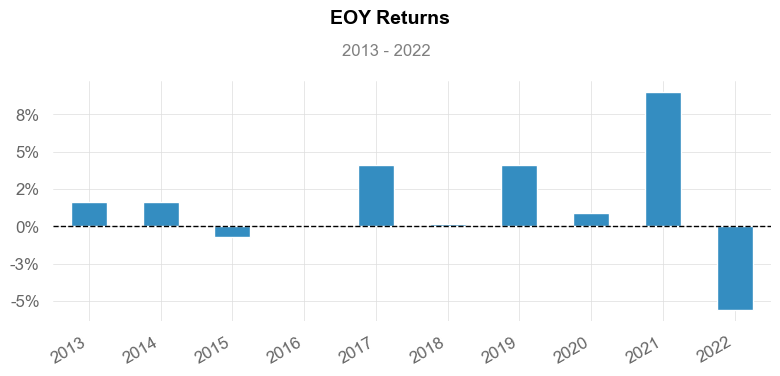

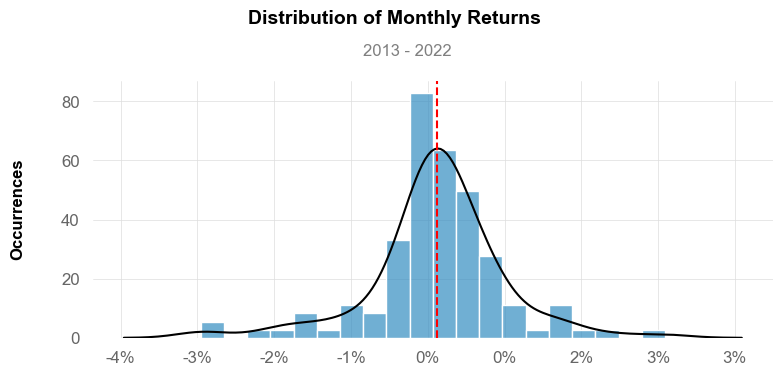

/Users/justincase/PycharmProjects/WSJ_News/.venv/lib/python3.9/site-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [50]:
qs.reports.full(returns)